In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [7]:
numeric_cols=['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
#minimum values
np.min(df[numeric_cols])

Id               1.0
SepalLengthCm    4.3
SepalWidthCm     2.0
PetalLengthCm    1.0
PetalWidthCm     0.1
dtype: float64

In [8]:
#maximum values
np.max(df[numeric_cols])

Id               150.0
SepalLengthCm      7.9
SepalWidthCm       4.4
PetalLengthCm      6.9
PetalWidthCm       2.5
dtype: float64

In [9]:
#mean values
np.mean(df[numeric_cols])

Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64

In [13]:
#standard deviation
np.std(df[numeric_cols])

Id               43.300308
SepalLengthCm     0.825301
SepalWidthCm      0.432147
PetalLengthCm     1.758529
PetalWidthCm      0.760613
dtype: float64

In [14]:
#variance
np.var(df[numeric_cols])

Id               1874.916667
SepalLengthCm       0.681122
SepalWidthCm        0.186751
PetalLengthCm       3.092425
PetalWidthCm        0.578532
dtype: float64

In [17]:
df.quantile([0.0,0.25,0.5,1.0],numeric_only=True)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0.00,1.00,4.3,2.0,1.00,0.1
0.25,38.25,5.1,2.8,1.60,0.3
0.50,75.50,5.8,3.0,4.35,1.3
1.00,150.00,7.9,4.4,6.90,2.5


Text(0.5, 0.98, 'Feature Distributions')

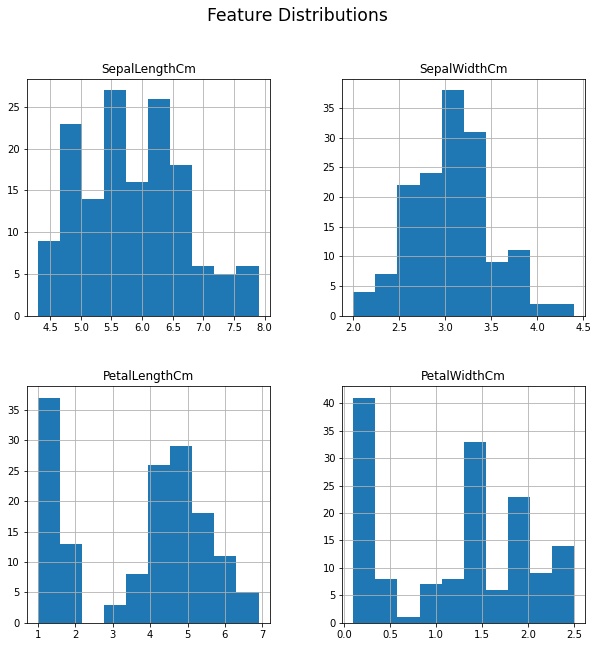

In [38]:
import pylab
import seaborn as sns

# df.hist() function calls matplotlib.pyplot.hist(), on each series in the DataFrame
# resulting in one histogram per column.
feature_cols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
df.hist(feature_cols,figsize=(10,10))

pylab.suptitle("Feature Distributions", fontsize="xx-large")

Text(0.5, 0.98, 'Feature Distributions')

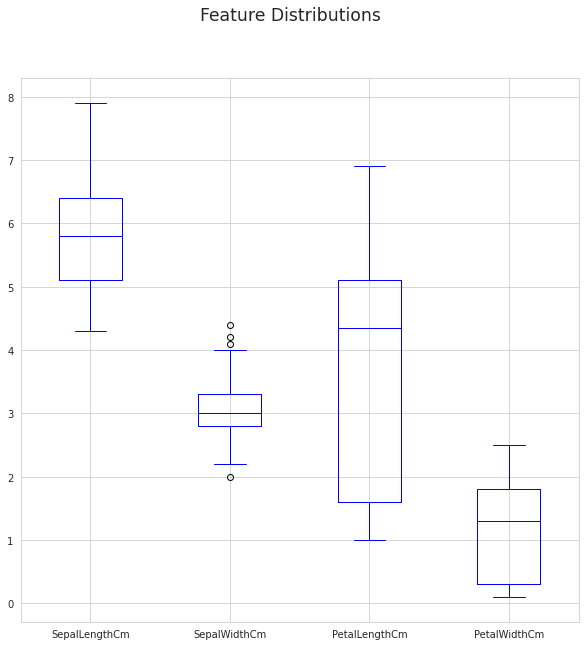

In [79]:
df.boxplot(feature_cols,figsize=(10,10),color='blue')
pylab.suptitle("Feature Distributions", fontsize="xx-large")

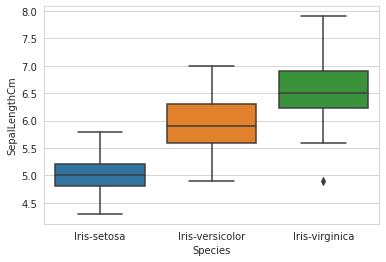

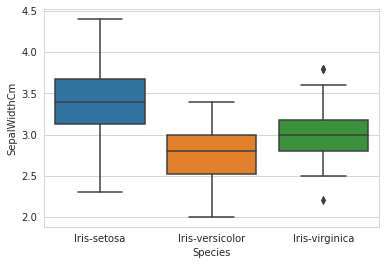

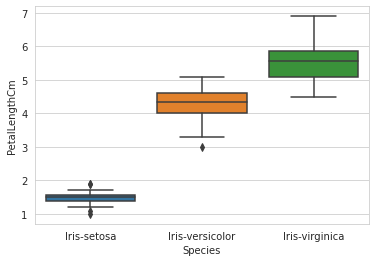

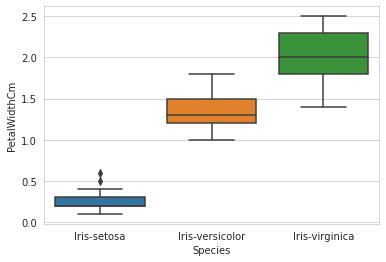

In [57]:
sns.boxplot(x="Species",y="SepalLengthCm",data=df)
plt.show()
sns.boxplot(x="Species",y="SepalWidthCm",data=df)
plt.show()
sns.boxplot(x="Species",y="PetalLengthCm",data=df)
plt.show()
sns.boxplot(x="Species",y="PetalWidthCm",data=df)
plt.show()

In [58]:
# convert dataframe from wide to long
dfl = pd.melt(df, id_vars='Species', value_vars=['SepalLengthCm','SepalWidthCm', 'PetalLengthCm','PetalWidthCm'])
dfl.head()

,Species,variable,value
0,Iris-setosa,SepalLengthCm,5.1
1,Iris-setosa,SepalLengthCm,4.9
2,Iris-setosa,SepalLengthCm,4.7
3,Iris-setosa,SepalLengthCm,4.6
4,Iris-setosa,SepalLengthCm,5.0


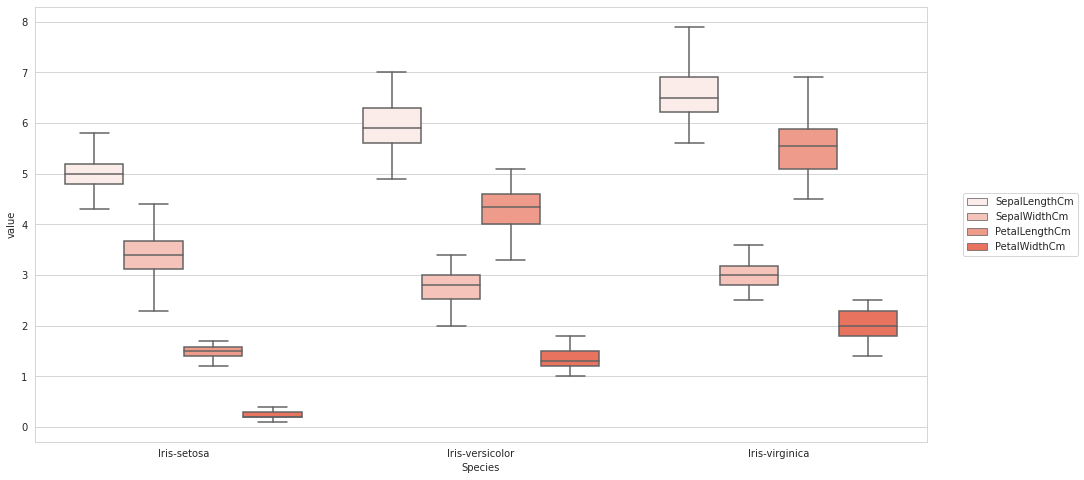

In [84]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Species', y='value', data=dfl, showfliers=False, color='tomato', hue='variable')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)